### Deadline 23.01.2022

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
!pip install --force-reinstall tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.0 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.0 which is incompatible.
astroid 2.6.6 requires wrapt<1.13,>=1.11, but you have wrapt 1.14.1 which is incompatible.



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=c71321d516bd2f096f8dc5a000eadc0ea8cc0e5a4e1210f6f312966e0a0d9f28
  Stored in directory: c:\users\svbur\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
  Attempting uninstall: idna
    Found existing installation: idna 3.2
    Uninstalling idna-3.2:
      Successfully uninstalled idna-3.2
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 2.0.4
    Uninstalling charset-normalizer-2.0.4:
      Successfully uninstalled charset-normalizer-2.0.4
  Attempting uninstall: certifi
    Found existing installation: certifi 2021.10.8
    Uninstalling certifi-2021.10.8:
      Successfully uninstalled certifi-2021.10.8
  Attempting uninstal

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<AxesSubplot:xlabel='x1', ylabel='x2'>

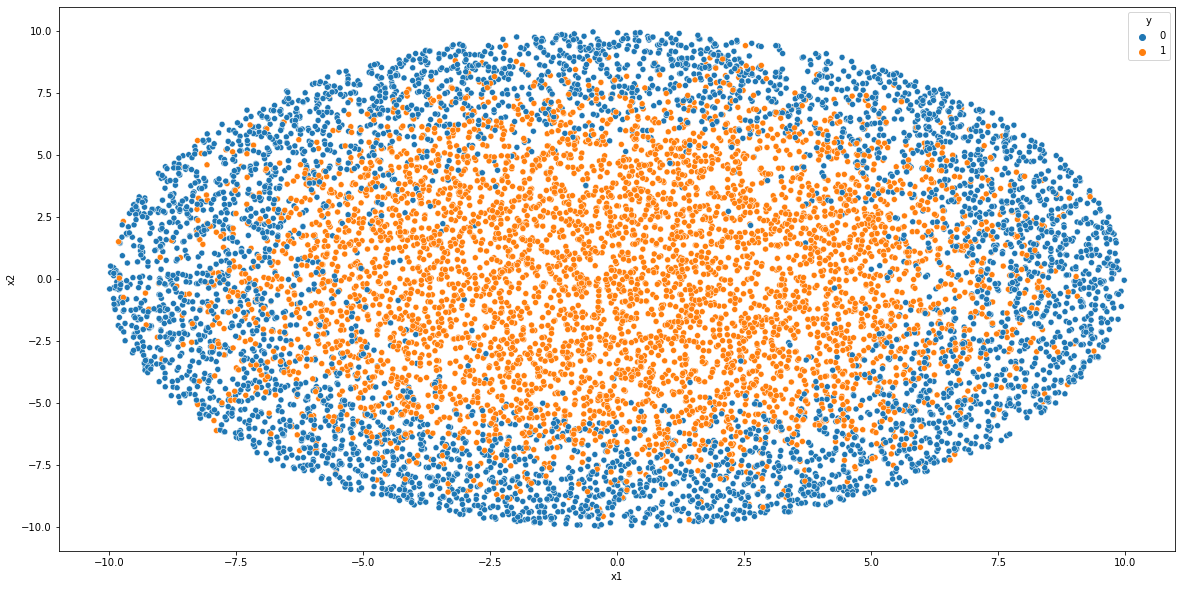

In [3]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

In [6]:
df.head(10)

,x1,x2,y
0,-4.626272,-6.658988,0
1,-7.789640,0.262519,0
2,-8.739678,1.537758,0
3,-2.546441,-7.705224,0
4,-2.751506,-7.940187,0
5,0.303440,5.969639,0
6,-5.920224,1.339210,1
7,-7.555594,0.733846,1
8,5.995393,-4.607815,0
9,1.465613,4.338939,1


После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [42]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5996969696969697


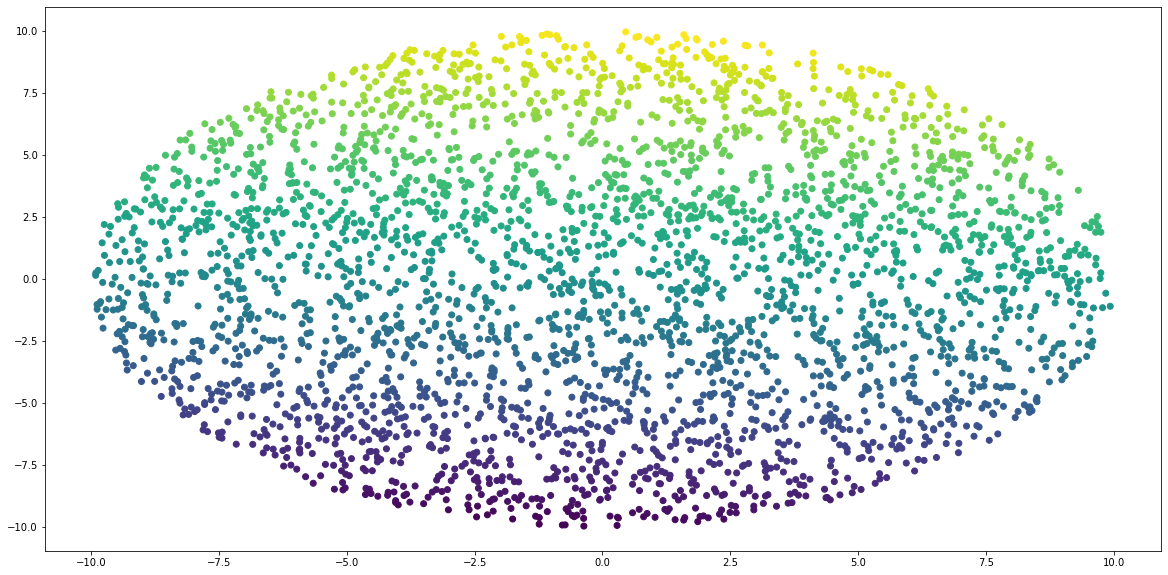

In [59]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_logit = lr.predict(X_test)
predict_log_proba = lr.predict_log_proba(X_test)[:,1]

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8354545454545454


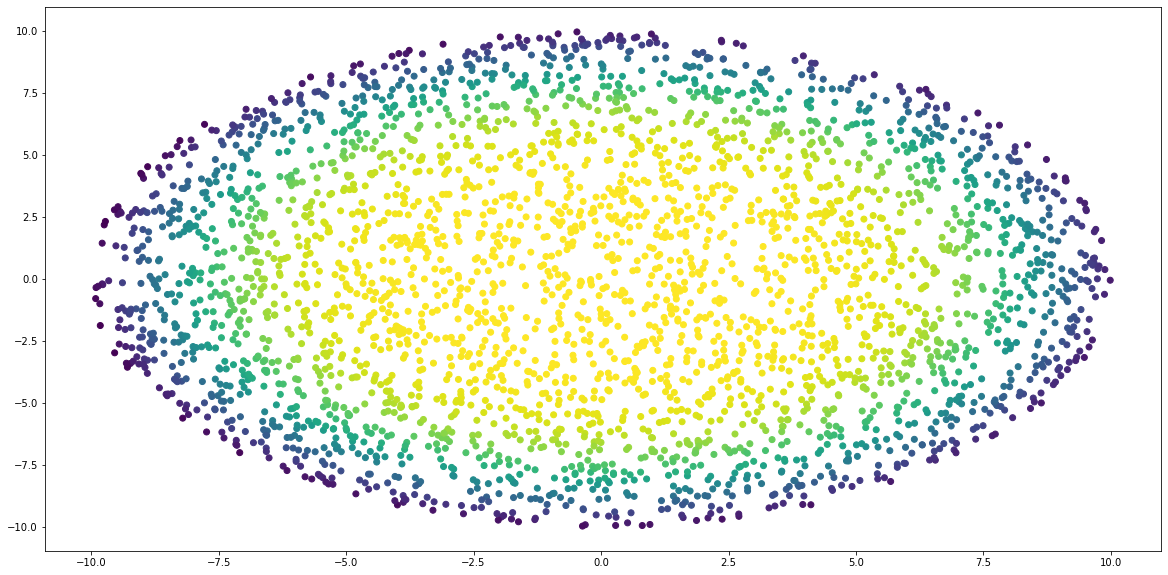

In [60]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = np.sqrt(df_new['x1']**2 + df_new['x2']**2)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

lr.fit(X_train_new, y_train_new)
predict_logit = lr.predict(X_test_new)
predict_log_proba = lr.predict_log_proba(X_test_new)[:,1]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

**MAGIC!!!** :0

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Точность нашей модели 0.78


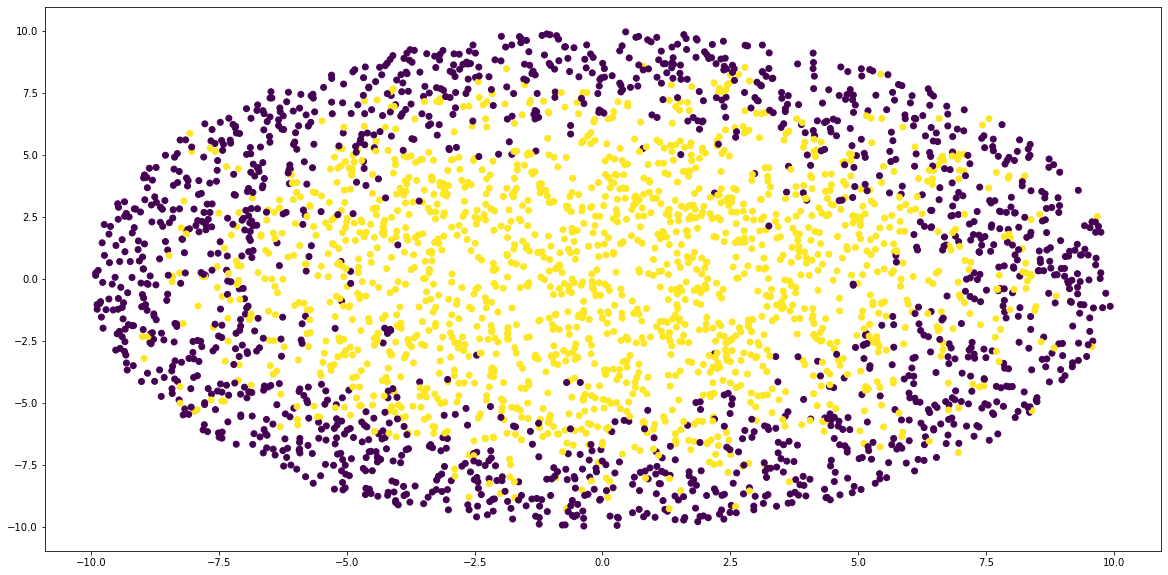

In [61]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код
dt = DecisionTreeClassifier(random_state = 10)
dt.fit(X_train, y_train)

predict_tree = dt.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = dt.predict_proba(X_test)[:,1]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.8266666666666667


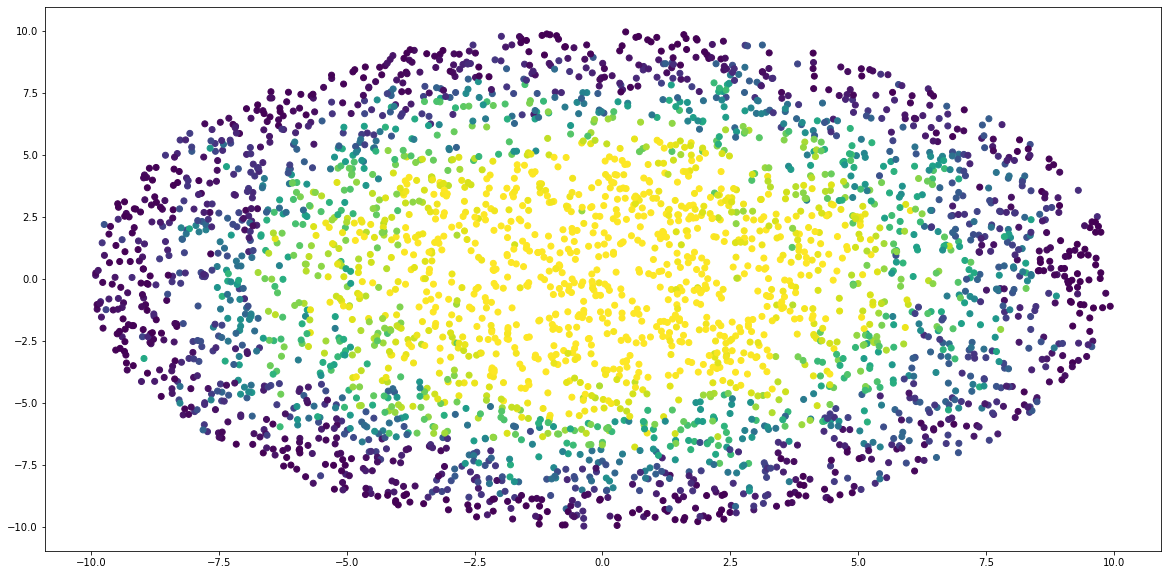

In [62]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

rf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rf.fit(X_train, y_train)

predict_forest = rf.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = rf.predict_proba(X_test)[:,1]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [52]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   # Последовательность слоёв
import tensorflow.keras.layers as L              # Разные слои
import tensorflow.keras.optimizers as opt        # Оптимизаторы

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#########################################
# Ваш код

predict_neural = # ...
predict_classes = # ...

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)